Nockout a node
Set all the weights from it to 0

In [3]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from pprint import pprint
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
%matplotlib inline


In [4]:
mnist = input_data.read_data_sets("tmp/data/", one_hot = True)

n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500
n_classes = 10
batch_size = 100

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting tmp/data/t10k-images-idx3-ubyte.gz
Extracting tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
x = tf.placeholder('float', [None, 784])
y = tf.placeholder('float')
l1_weights = []
l1_biases = []
l2_weights = []
l2_biases = []
l3_weights = []
l3_biases = []
out_weights = []
out_biases = []


In [6]:
class TfAnn(object):
    
    def __init__(self):
        self.hidden_1_layer = {'weights':[],'biases':[]}
        self.hidden_2_layer = {'weights':[],'biases':[]}
        self.hidden_3_layer = {'weights':[],'biases':[]}
        self.output_layer = {'weights':[],'biases':[]}
        self.np_hidden_1_layer={"weights":[],"biases":[]}
        self.np_hidden_2_layer={"weights":[],"biases":[]}
        self.np_hidden_3_layer={"weights":[],"biases":[]}
        self.np_output_layer={"weights":[],"biases":[]}
    
    def init_empty(self,size,n_nodes_hl1,n_nodes_hl2,n_nodes_hl3,n_classes):
        self.hidden_1_layer = {'weights':tf.Variable(tf.random_normal([size, n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}

        self.hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                          'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

        self.hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                          'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}

        self.output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
                        'biases':tf.Variable(tf.random_normal([n_classes]))}


    def init_values(self,size,l1_weights,l2_weights,l3_weights,out_weights,l1_biases,l2_biases,l3_biases,out_biases):
        self.hidden_1_layer = {'weights':tf.Variable(l1_weights),'biases':tf.Variable(l1_biases)}
        self.hidden_2_layer = {'weights':tf.Variable(l2_weights),'biases':tf.Variable(l2_biases)}
        self.hidden_3_layer = {'weights':tf.Variable(l3_weights),'biases':tf.Variable(l3_biases)}
        self.output_layer = {'weights':tf.Variable(out_weights),'biases':tf.Variable(out_biases)}


    def create(self,data):
        l1 = tf.add(tf.matmul(data,self.hidden_1_layer['weights']), self.hidden_1_layer['biases'])
        l1 = tf.nn.relu(l1)

        l2 = tf.add(tf.matmul(l1,self.hidden_2_layer['weights']), self.hidden_2_layer['biases'])
        l2 = tf.nn.relu(l2)

        l3 = tf.add(tf.matmul(l2,self.hidden_3_layer['weights']), self.hidden_3_layer['biases'])
        l3 = tf.nn.relu(l3)

        output =  tf.add(tf.matmul(l3,self.output_layer['weights']) , self.output_layer['biases'])

        return output
    
    def extract(self):
        self.np_hidden_1_layer["weights"] = neural_network_model.hidden_1_layer["weights"].eval()
        self.np_hidden_2_layer["weights"] = neural_network_model.hidden_2_layer["weights"].eval()
        self.np_hidden_3_layer["weights"] = neural_network_model.hidden_3_layer["weights"].eval()
        self.np_output_layer["weights"] = neural_network_model.output_layer["weights"].eval()
        self.np_hidden_1_layer["biases"] = neural_network_model.hidden_1_layer["biases"].eval()
        self.np_hidden_2_layer["biases"] = neural_network_model.hidden_2_layer["biases"].eval()
        self.np_hidden_3_layer["biases"] = neural_network_model.hidden_3_layer["biases"].eval()
        self.np_output_layer["biases"] = neural_network_model.output_layer["biases"].eval()
        

In [7]:
def test_neural_network_interactive(d,neural_network_model):
    prediction = neural_network_model.create(d)
    hm_epochs = 10
    sess = tf.InteractiveSession()
    init = tf.initialize_all_variables()
    sess.run(init)
    correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
    print('Accuracy:',accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))

     
    y_test=(sess.run(prediction,feed_dict={
                             x: mnist.test.images
                              }))       
    
    true_class=np.argmax(mnist.test.labels,1)
    predicted_class=np.argmax(y_test,1)
    cm=confusion_matrix(predicted_class,true_class)
    pprint(cm)

In [8]:
def knock_out(layer,node):
    width,height = layer.shape
    for i in range(height):
        layer[node,i]=0.0

In [9]:
def load_matrix():
    global l1_weights 
    global l1_biases
    global l2_weights 
    global l2_biases 
    global l3_weights 
    global l3_biases 
    global out_weights 
    global out_biases 

    l1_weights = np.genfromtxt("Data/l1_weights.csv", delimiter=",").astype(np.float32)
    l1_biases = np.genfromtxt("Data/l1_biases.csv", delimiter=",").astype(np.float32)
    l2_weights = np.genfromtxt("Data/l2_weights.csv", delimiter=",").astype(np.float32)
    l2_biases = np.genfromtxt("Data/l2_biases.csv", delimiter=",").astype(np.float32)
    l3_weights = np.genfromtxt("Data/l3_weights.csv", delimiter=",").astype(np.float32)
    l3_biases = np.genfromtxt("Data/l3_biases.csv", delimiter=",").astype(np.float32)
    out_weights = np.genfromtxt("Data/out_weights.csv", delimiter=",").astype(np.float32)
    out_biases = np.genfromtxt("Data/out_biases.csv", delimiter=",").astype(np.float32)


In [10]:
load_matrix()
test_neural_network_model = TfAnn()
test_neural_network_model.init_values(784,l1_weights,l2_weights,l3_weights,out_weights,l1_biases,l2_biases,l3_biases,out_biases)
test_neural_network_interactive(x,test_neural_network_model)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Accuracy: 0.9503
array([[ 944,    0,    4,    0,    0,    2,    4,    0,    3,    0],
       [   0, 1112,    3,    0,    3,    2,    2,    1,    1,    8],
       [   7,    1,  980,    8,    2,    1,    4,   14,    2,    2],
       [   0,    0,    9,  952,    1,   21,    0,    4,    8,    2],
       [   0,    0,    2,    0,  900,    0,    5,    5,    5,    4],
       [   2,    1,    2,   12,    1,  826,   10,    1,    5,    4],
       [  12,    3,    4,    0,    8,    8,  918,    0,    1,    2],
       [   3,    3,    7,    8,    8,    1,    1,  965,    7,    8],
       [  10,   15,   20,   27,   12,   25,   13,    5,  936,    9],
       [   2,    0,    1,    3,   47,    6,    1,   33,    6,  970]])


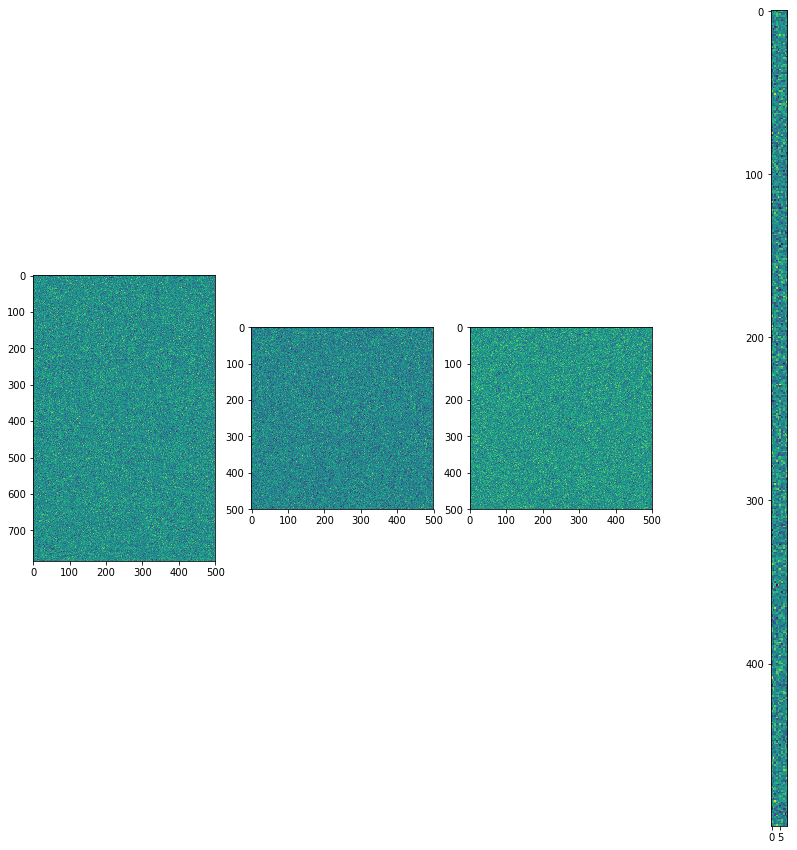

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(15,15))
weights=[l1_weights,l2_weights,l3_weights,out_weights]
for i, ax in enumerate(axes.flat):
        ax.imshow(weights[i])     
plt.show()

In [12]:
for i in range(50,100):
    knock_out(l1_weights,i)

In [13]:
test_neural_network_nock_out_model = TfAnn()
test_neural_network_nock_out_model.init_values(784,l1_weights,l2_weights,l3_weights,out_weights,l1_biases,l2_biases,l3_biases,out_biases)
test_neural_network_interactive(x,test_neural_network_nock_out_model)

/home/ric/Projects/HOMLWSLT/env/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Accuracy: 0.9496
array([[ 945,    0,    4,    0,    0,    2,    3,    0,    3,    0],
       [   0, 1113,    3,    0,    3,    2,    2,    1,    1,    8],
       [   7,    2,  975,    7,    2,    1,    4,   14,    2,    2],
       [   0,    0,    9,  952,    1,   20,    0,    4,    8,    2],
       [   0,    0,    3,    0,  900,    0,   11,    5,    5,    4],
       [   2,    2,    2,   12,    1,  827,   11,    1,    5,    4],
       [  11,    2,    5,    0,    8,    7,  913,    0,    1,    2],
       [   3,    3,    7,    8,    8,    1,    1,  965,    7,    8],
       [  10,   13,   23,   28,   12,   26,   13,    5,  936,    9],
       [   2,    0,    1,    3,   47,    6,    0,   33,    6,  970]])


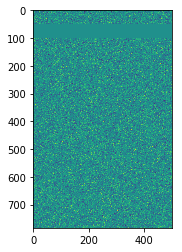

In [14]:
plt.imshow(l1_weights)

In [15]:
f = int(748/11)
for j in range(0,11):
    load_matrix()
    for i in range((j*f),((j+1)*f)):
        
        knock_out(l1_weights,i)
    print((j*f),((j+1)*f))
    test_neural_network_nock_out_model = TfAnn()
    test_neural_network_nock_out_model.init_values(784,l1_weights,l2_weights,l3_weights,out_weights,l1_biases,l2_biases,l3_biases,out_biases)
    test_neural_network_interactive(x,test_neural_network_nock_out_model)

0 68
Accuracy: 0.9502
array([[ 944,    0,    4,    0,    0,    2,    3,    0,    3,    0],
       [   0, 1112,    3,    0,    3,    2,    2,    1,    1,    8],
       [   7,    2,  979,    8,    2,    1,    4,   14,    2,    2],
       [   0,    0,    9,  952,    1,   21,    0,    4,    8,    2],
       [   0,    0,    2,    0,  900,    0,    6,    5,    5,    4],
       [   2,    1,    2,   12,    1,  826,   10,    1,    5,    4],
       [  12,    2,    5,    0,    8,    8,  918,    0,    1,    2],
       [   3,    3,    7,    8,    8,    1,    1,  965,    7,    8],
       [  10,   15,   20,   27,   12,   25,   13,    5,  936,    9],
       [   2,    0,    1,    3,   47,    6,    1,   33,    6,  970]])
68 136
Accuracy: 0.9449
array([[ 942,    0,    3,    0,    0,    2,    4,    0,    2,    0],
       [   0, 1113,    8,    0,    3,    1,    2,    1,    1,    8],
       [   7,    4,  967,    9,    4,    3,    4,   14,    3,    2],
       [   0,    0,    7,  932,    1,   19,    0,    4, 

In [16]:


from functools import reduce
def factors(n):    
    return set(reduce(list.__add__,([i, n//i] for i in range(1, int(n**0.5) + 1) if n % i == 0)))
print(factors(748))


{1, 2, 34, 4, 68, 11, 748, 44, 17, 374, 22, 187}
